<a href="https://colab.research.google.com/github/NourhanDeifSayed/-Handwritten-Signature-Verification/blob/main/project_Handwritten_signature_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/robinreni/signature-verification-dataset/data

In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import os
import tensorflow as tf

In [ ]:
!mkdir Train
!mkdir Test

!mkdir Train/Fake
!mkdir Train/Real

!mkdir Test/Fake
!mkdir Test/Real

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

Saving signature-verification-dataset-metadata.json to signature-verification-dataset-metadata.json


In [ ]:
!kaggle datasets download -d robinreni/signature-verification-dataset
!unzip signature-verification-dataset.zip -d /content/

Dataset URL: https://www.kaggle.com/datasets/robinreni/signature-verification-dataset
License(s): CC0-1.0
 98% 591M/601M [00:06<00:00, 24.2MB/s]
100% 601M/601M [00:06<00:00, 104MB/s] 
Archive:  signature-verification-dataset.zip
  inflating: /content/sign_data/sign_data/test/049/01_049.png  
  inflating: /content/sign_data/sign_data/test/049/02_049.png  
  inflating: /content/sign_data/sign_data/test/049/03_049.png  
  inflating: /content/sign_data/sign_data/test/049/04_049.png  
  inflating: /content/sign_data/sign_data/test/049/05_049.png  
  inflating: /content/sign_data/sign_data/test/049/06_049.png  
  inflating: /content/sign_data/sign_data/test/049/07_049.png  
  inflating: /content/sign_data/sign_data/test/049/08_049.png  
  inflating: /content/sign_data/sign_data/test/049/09_049.png  
  inflating: /content/sign_data/sign_data/test/049/10_049.png  
  inflating: /content/sign_data/sign_data/test/049/11_049.png  
  inflating: /content/sign_data/sign_data/test/049/12_049.png  
  i

In [ ]:
!ls /content/

sample_data				      signature-verification-dataset.zip  Test
signature-verification-dataset-metadata.json  sign_data				  Train


In [ ]:
import os
import shutil

train_path = '/content/sign_data/train/'
test_path = '/content/sign_data/test/'

os.makedirs('/content/Train/Real', exist_ok=True)
os.makedirs('/content/Train/Fake', exist_ok=True)
os.makedirs('/content/Test/Real', exist_ok=True)
os.makedirs('/content/Test/Fake', exist_ok=True)

In [ ]:
for filename in os.listdir(train_path):
    try:
        file_path = os.path.join(train_path, filename)
        if os.path.isdir(file_path):
            continue
        if 'forg' in filename:
            shutil.copy(file_path, '/content/Train/Fake')
        else:
            shutil.copy(file_path, '/content/Train/Real')
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

for filename in os.listdir(test_path):
    try:
        file_path = os.path.join(test_path, filename)
        if os.path.isdir(file_path):
            continue
        if 'forg' in filename:
            shutil.copy(file_path, '/content/Test/Fake')
        else:
            shutil.copy(file_path, '/content/Test/Real')
    except Exception as e:
        print(f"Error processing file {filename}: {e}")

train_dir = os.path.join("/content/Train/")
test_dir = os.path.join("/content/Test/")


In [ ]:
os.listdir('/content/sign_data/train/')

['033',
 '044',
 '006',
 '012_forg',
 '027_forg',
 '051_forg',
 '018_forg',
 '041_forg',
 '013',
 '016_forg',
 '030_forg',
 '048_forg',
 '064',
 '059_forg',
 '014',
 '049_forg',
 '036',
 '052_forg',
 '057',
 '016',
 '036_forg',
 '067_forg',
 '030',
 '046_forg',
 '056',
 '041',
 '029_forg',
 '062',
 '069',
 '003',
 '050_forg',
 '068',
 '024_forg',
 '025',
 '040',
 '050',
 '014_forg',
 '019_forg',
 '063',
 '033_forg',
 '025_forg',
 '042',
 '020',
 '021_forg',
 '047',
 '009_forg',
 '052',
 '047_forg',
 '038_forg',
 '043_forg',
 '065_forg',
 '026',
 '053',
 '034',
 '049',
 '019',
 '067',
 '064_forg',
 '039_forg',
 '058_forg',
 '069_forg',
 '012',
 '024',
 '061',
 '046',
 '060',
 '013_forg',
 '039',
 '054',
 '028_forg',
 '037',
 '043',
 '031_forg',
 '056_forg',
 '038',
 '051',
 '057_forg',
 '023_forg',
 '026_forg',
 '055',
 '060_forg',
 '045',
 '055_forg',
 '048',
 '062_forg',
 '058',
 '066_forg',
 '015',
 '020_forg',
 '059',
 '022',
 '066',
 '021',
 '031',
 '028',
 '001',
 '034_forg',
 '00

In [ ]:
for folder in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if 'forg' in folder:
                shutil.copy(file_path, '/content/Train/Fake')
            else:
                shutil.copy(file_path, '/content/Train/Real')

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            if 'forg' in folder:
                shutil.copy(file_path, '/content/Test/Fake')
            else:
                shutil.copy(file_path, '/content/Test/Real')

In [ ]:
print(os.listdir('/content/Train/Real'))
print(os.listdir('/content/Train/Fake'))
print(os.listdir('/content/Test/Real'))
print(os.listdir('/content/Test/Fake'))

['004_09.PNG', '07_036.png', '10_031.png', '06_018.png', '01_022.png', '12_020.png', '05_020.png', '08_020.png', '06_030.png', '11_055.png', '015_09.PNG', '11_041.png', '003_16.PNG', '09_017.png', '009_07.PNG', '015_20.PNG', '06_069.png', '003_24.PNG', '06_053.png', '03_026.png', '01_058.png', '02_031.png', '12_058.png', '001_02.PNG', '09_056.png', '02_059.png', '002_20.PNG', '07_013.png', '11_036.png', '01_036.png', '04_049.png', '009_21.PNG', '02_038.png', '10_052.png', '05_017.png', '003_17.PNG', '01_021.png', '07_021.png', '05_025.png', '02_054.png', '03_054.png', '08_033.png', '07_052.png', '014_12.PNG', '003_19.PNG', '05_069.png', '012_16.PNG', '09_031.png', '014_10.PNG', '06_036.png', '07_039.png', '002_10.PNG', '001_24.PNG', '10_067.png', '12_060.png', '014_08.PNG', '02_060.png', '03_018.png', '01_041.png', '10_013.png', '003_06.PNG', '04_043.png', '10_045.png', '10_069.png', '12_067.png', '07_049.png', '01_030.png', '11_043.png', '015_15.PNG', '11_035.png', '02_055.png', '02_0

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
    fill_mode='reflect'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

Found 1649 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=64,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


Label :  0.0


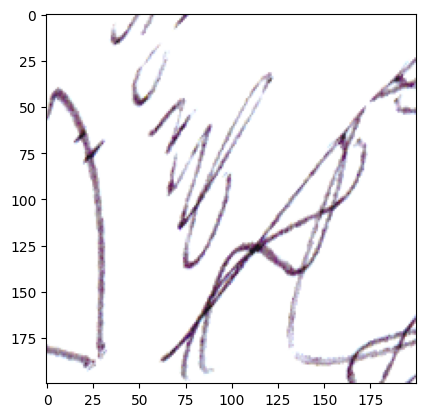

In [ ]:
plt.imshow(train_generator[0][0][5])
print("Label : ",train_generator[0][1][5])

Label :  1.0


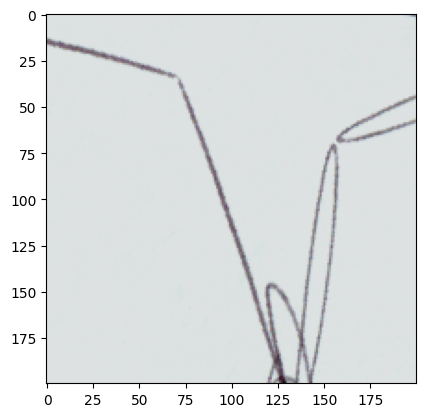

In [ ]:
plt.imshow(train_generator[0][0][30])
print("Label : ",train_generator[0][1][30])

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout,BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda, Dense, Dropout, BatchNormalization
import tensorflow.keras.backend as K

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
input_shape = (200, 200, 3)
pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [ ]:
x = pretrained_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=pretrained_model.input, outputs=x)

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 206, 206, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 100, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 100, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 100, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 102, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 50, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 50, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 50, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 50, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 50, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 50, 50, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 50, 50, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,975,169 (95.27 MB)

 Trainable params: 1,387,073 (5.29 MB)

 Non-trainable params: 23,588,096 (89.98 MB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 386ms/step - accuracy: 0.7812 - loss: 0.4747
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 404ms/step - accuracy: 0.7870 - loss: 0.4469
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 426ms/step - accuracy: 0.8021 - loss: 0.4348
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 387ms/step - accuracy: 0.8155 - loss: 0.4229
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 24s 387ms/step - accuracy: 0.8089 - loss: 0.4446
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 421ms/step - accuracy: 0.7919 - loss: 0.4622
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 405ms/step - accuracy: 0.7825 - loss: 0.4742
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 402ms/step - accuracy: 0.7933 - loss: 0.4418
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 385ms/step - accuracy: 0.8092 - loss: 0.4352
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 24s 386ms/step - accuracy: 0.8071 - loss: 0.4334
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 424ms/step - accuracy: 0.7912 - loss: 0.4443
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 24

In [ ]:
model.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.5405 - loss: 0.9225


[0.9398893117904663, 0.5299999713897705]

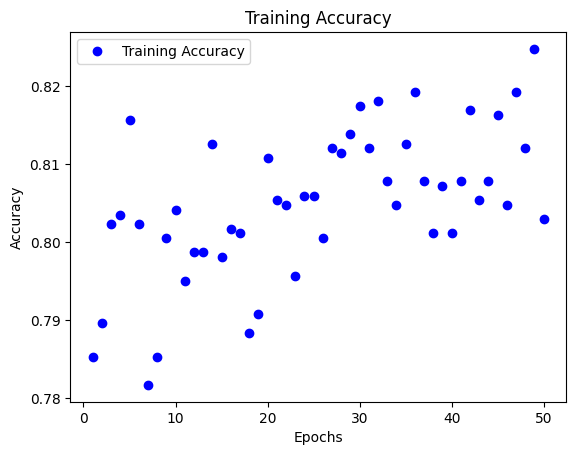

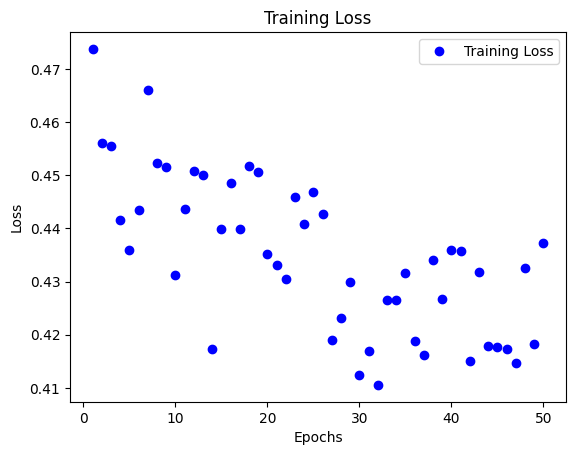

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


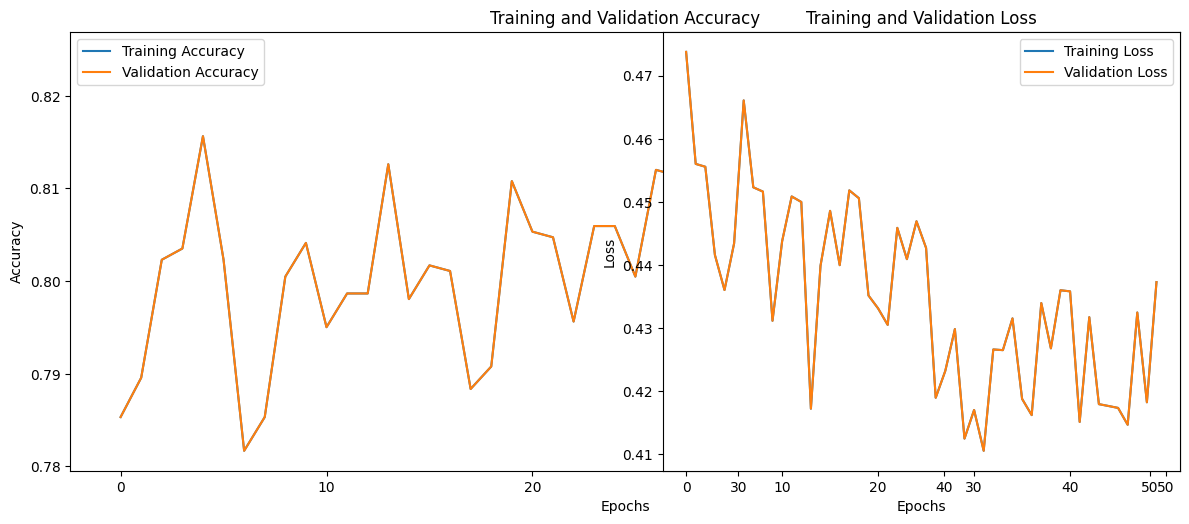

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


https://www.kaggle.com/datasets/divyanshrai/handwritten-signatures




In [ ]:
from google.colab import files
files.upload()

Saving handwritten-signatures-metadata.json to handwritten-signatures-metadata.json


{'handwritten-signatures-metadata.json': b'{"@context":{"@language":"en","@vocab":"https://schema.org/","citeAs":"cr:citeAs","column":"cr:column","conformsTo":"dct:conformsTo","cr":"http://mlcommons.org/croissant/","data":{"@id":"cr:data","@type":"@json"},"dataBiases":"cr:dataBiases","dataCollection":"cr:dataCollection","dataType":{"@id":"cr:dataType","@type":"@vocab"},"dct":"http://purl.org/dc/terms/","extract":"cr:extract","field":"cr:field","fileProperty":"cr:fileProperty","fileObject":"cr:fileObject","fileSet":"cr:fileSet","format":"cr:format","includes":"cr:includes","isEnumeration":"cr:isEnumeration","jsonPath":"cr:jsonPath","key":"cr:key","md5":"cr:md5","parentField":"cr:parentField","path":"cr:path","personalSensitiveInformation":"cr:personalSensitiveInformation","recordSet":"cr:recordSet","references":"cr:references","regex":"cr:regex","repeated":"cr:repeated","replace":"cr:replace","sc":"https://schema.org/","separator":"cr:separator","source":"cr:source","subField":"cr:subFi

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d divyanshrai/handwritten-signatures

Dataset URL: https://www.kaggle.com/datasets/divyanshrai/handwritten-signatures
License(s): unknown
 94% 349M/370M [00:01<00:00, 232MB/s]
100% 370M/370M [00:01<00:00, 232MB/s]


In [ ]:
import zipfile
zip_file = 'handwritten-signatures.zip'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('handwritten-signatures')

In [ ]:
data_folder = '/content/handwritten-signatures'

In [ ]:
import os
import shutil

In [ ]:
test_path = '/content/sign_data_2/test/'

os.makedirs(os.path.join(test_path, 'Real'), exist_ok=True)
os.makedirs(os.path.join(test_path, 'Fake'), exist_ok=True)

In [ ]:
import os
base_path = "/content/handwritten-signatures/Dataset_Signature_Final/Dataset"

real_images_paths = []
forge_images_paths = []

for dataset in os.listdir(base_path):
    dataset_path = os.path.join(base_path, dataset)
    if os.path.isdir(dataset_path):
        real_path = os.path.join(dataset_path, "real")
        forge_path = os.path.join(dataset_path, "forge")

        if os.path.exists(real_path):
            for img in os.listdir(real_path):
                real_image_path = os.path.join(real_path, img)
                real_images_paths.append(real_image_path)
                shutil.move(real_image_path, os.path.join(test_path, 'Real', img))  # Move real images

        if os.path.exists(forge_path):
            for img in os.listdir(forge_path):
                forge_image_path = os.path.join(forge_path, img)
                forge_images_paths.append(forge_image_path)
                shutil.move(forge_image_path, os.path.join(test_path, 'Fake', img))  # Move forged images

print("Real Images Paths:")
print(real_images_paths[:5])

print("\nForge Images Paths:")
print(forge_images_paths[:5])

Real Images Paths:
['/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00204002.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00101001.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00903009.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00703007.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/00500005.png']

Forge Images Paths:
['/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/02100009.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/02100007.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/02103012.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/02104005.png', '/content/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/02101007.png']


In [ ]:
new_test_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
).flow_from_directory(
    test_path,
    target_size=(200, 200),
    batch_size=64,
    class_mode='binary'
)


Found 472 images belonging to 2 classes.


In [ ]:
loss, accuracy = model.evaluate(new_test_generator, steps=new_test_generator.samples // new_test_generator.batch_size)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7090 - loss: 1.1173
Loss: 1.18907630443573
Accuracy: 0.6941964030265808


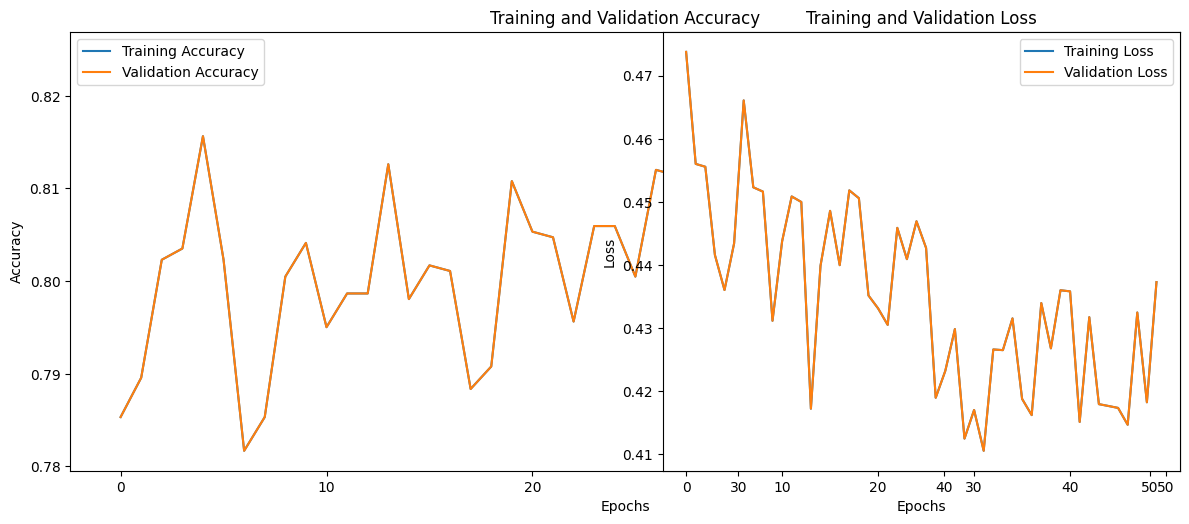

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
